In [1]:
!pip install matplotlib

In [2]:
!pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../transactions.csv')

In [5]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,sex,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [6]:
df = df.dropna()
df = df.drop_duplicates()

In [7]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,sex,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


# 1. What is the distribution between fraudulent and non-fraudulent transactions?

In [8]:
distribution = df["is_fraud"].value_counts()

In [9]:
distribution

0    1842743
1       9651
Name: is_fraud, dtype: int64

This dataset appears to be incredibly imbalanced, which means that most likely small details in differing features will have to be used to create patterns and clusters, as well as any training and testing will need to make sure to be stratified so some sets do not have all nonfraud and skew the metrics

# 2. Which age groups are more susceptible to fraudulent transactions?

In [10]:
df2 = df.copy()
bins = [1883, 1901, 1928, 1946, 1965, 1981, 1997, 2013, 2024]

df2['dob'] = df2['dob'].str.slice(0,4).astype(int)
df2['generation'] = pd.cut(df2['dob'], bins=bins)

In [11]:
df2["dob"]

0          1988
1          1978
2          1962
3          1967
4          1986
           ... 
1852389    1966
1852390    1999
1852391    1981
1852392    1965
1852393    1993
Name: dob, Length: 1852394, dtype: int64

In [12]:
df2["generation"]

0          (1981, 1997]
1          (1965, 1981]
2          (1946, 1965]
3          (1965, 1981]
4          (1981, 1997]
               ...     
1852389    (1965, 1981]
1852390    (1997, 2013]
1852391    (1965, 1981]
1852392    (1946, 1965]
1852393    (1981, 1997]
Name: generation, Length: 1852394, dtype: category
Categories (8, interval[int64, right]): [(1883, 1901] < (1901, 1928] < (1928, 1946] < (1946, 1965] < (1965, 1981] < (1981, 1997] < (1997, 2013] < (2013, 2024]]

In [13]:
df2["generation"].value_counts()

(1965, 1981]    616544
(1981, 1997]    607074
(1946, 1965]    375216
(1928, 1946]    143747
(1997, 2013]     87831
(1901, 1928]     21982
(1883, 1901]         0
(2013, 2024]         0
Name: generation, dtype: int64

In [14]:
counts = pd.crosstab(df2['is_fraud'], df2['generation'])

In [15]:
counts

generation,"(1901, 1928]","(1928, 1946]","(1946, 1965]","(1965, 1981]","(1981, 1997]","(1997, 2013]"
is_fraud,,,,,,
0,21836,142683,372792,613768,604284,87380
1,146,1064,2424,2776,2790,451


In [16]:
label_percentage_per_category = pd.crosstab(df2['generation'], df2['is_fraud'], normalize='all')

In [17]:
label_percentage_per_category

is_fraud,0,1
generation,,
"(1901, 1928]",0.011788,0.000079
"(1928, 1946]",0.077026,0.000574
"(1946, 1965]",0.201249,0.001309
"(1965, 1981]",0.331338,0.001499
"(1981, 1997]",0.326218,0.001506
"(1997, 2013]",0.047171,0.000243


In [18]:
generation_fraud = [(146/(146+21836), (1901,1928)), (1064/(142683 + 1064), (1928,1946)), (2424/(2424+372792), (1946, 1965)), (2776/(613768+2776), (1965, 1981)), (2790/(2790+604284), (1981, 1997)), (451/(451+87380), (1997, 2013))]

In [19]:
generation_fraud

[(0.006641797834591939, (1901, 1928)),
 (0.0074018936047360985, (1928, 1946)),
 (0.006460278879365486, (1946, 1965)),
 (0.004502517257486895, (1965, 1981)),
 (0.0045958153371747105, (1981, 1997)),
 (0.005134861267661759, (1997, 2013))]

From look at this, it is a little hard to tell if there is a correlation between generation and fraud, but the percentages shown here do heavily point to the older generations having a significantly higher fraud count, almost 50% higher in some counts, though still incredibly small. It also seems that this dataset does struggle a bit with finding data, probably because of the data available, in the very oldest, and the 2 youngest generations.

# 3. If a fraudulent transaction has been committed, what is the expected number of transaction committed per day with the same victim? (Temporal component asking do fraudulent transactions occur multiple times on the same customer)

In [20]:
df["trans_date_trans_time"]

0          2019-01-01 00:00:18
1          2019-01-01 00:00:44
2          2019-01-01 00:00:51
3          2019-01-01 00:01:16
4          2019-01-01 00:03:06
                  ...         
1852389    2020-12-31 23:59:07
1852390    2020-12-31 23:59:09
1852391    2020-12-31 23:59:15
1852392    2020-12-31 23:59:24
1852393    2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 1852394, dtype: object

In [21]:
df_day = df.copy()

df_day['trans_date_trans_time'] = df['trans_date_trans_time'].str.slice(0,10)


In [22]:
label_rows = df_day[df_day['is_fraud'].isin([1])]

In [23]:
label_rows["trans_date_trans_time"]

2449       2019-01-02
2472       2019-01-02
2523       2019-01-02
2546       2019-01-02
2553       2019-01-02
              ...    
1813872    2020-12-22
1813949    2020-12-22
1814016    2020-12-22
1814204    2020-12-22
1814246    2020-12-22
Name: trans_date_trans_time, Length: 9651, dtype: object

In [24]:
label_rows["first"]

2449        Jason
2472        Misty
2523        Misty
2546        Jason
2553        Misty
            ...  
1813872    Travis
1813949    Travis
1814016    Travis
1814204    Travis
1814246    Travis
Name: first, Length: 9651, dtype: object

In [25]:
df_day['trans_date_trans_time'] 

0          2019-01-01
1          2019-01-01
2          2019-01-01
3          2019-01-01
4          2019-01-01
              ...    
1852389    2020-12-31
1852390    2020-12-31
1852391    2020-12-31
1852392    2020-12-31
1852393    2020-12-31
Name: trans_date_trans_time, Length: 1852394, dtype: object

In [26]:
duplicate_rows = label_rows[label_rows.duplicated(['trans_date_trans_time', 'first', 'last', 'is_fraud'])]

In [27]:
duplicate_rows["first"]

2523        Misty
2546        Jason
2553        Misty
2937        Jason
3527        Jason
            ...  
1813872    Travis
1813949    Travis
1814016    Travis
1814204    Travis
1814246    Travis
Name: first, Length: 7725, dtype: object

In [28]:
duplication_counts = duplicate_rows.groupby(['trans_date_trans_time', 'first', 'last', 'is_fraud']).size().reset_index(name='counts')

In [29]:
print(duplication_counts)

     trans_date_trans_time        first      last  is_fraud  counts
0               2019-01-02        Jason    Murphy         1       3
1               2019-01-02        Misty      Hart         1       2
2               2019-01-03      Heather     Chase         1       3
3               2019-01-03        Jason    Murphy         1       3
4               2019-01-03        Misty      Hart         1       3
...                    ...          ...       ...       ...     ...
1836            2020-12-19  Christopher   Gilbert         1       6
1837            2020-12-20       Lauren  Anderson         1       3
1838            2020-12-21       Lauren  Anderson         1       6
1839            2020-12-21       Travis    Daniel         1       2
1840            2020-12-22       Travis    Daniel         1       6

[1841 rows x 5 columns]


In [30]:
duplication_counts["counts"].mean()

4.196089082020641

Strangely enough, it does look like with names and days correlated that the there are almost always multiple fraud counts in the same day, and somtimes even across several days, with the average being around 4 fraud accounts per day in some cases. This means that day may be useful in the final model

# 4. For each purchase "category," plot the mean and standard "amt" between fraudulent transactions and non-fraudulent transactions

In [31]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
sex                       object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [32]:
duplicate_rows_category = df_day[df_day.duplicated(['category', 'is_fraud'])]

In [33]:
duplicate_rows_category

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,sex,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
5,5,2019-01-01,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
7,7,2019-01-01,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0
10,10,2019-01-01,4642894980163,fraud_Rutherford-Mertz,grocery_pos,24.74,Eddie,Mendez,M,1831 Faith View Suite 653,...,40.7491,-95.0380,7297,IT trainer,1990-07-13,d71c95ab6b7356dd74389d41df429c87,1325376383,40.275891,-96.011548,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,1852389,2020-12-31,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,1852390,2020-12-31,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,1852391,2020-12-31,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,1852392,2020-12-31,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


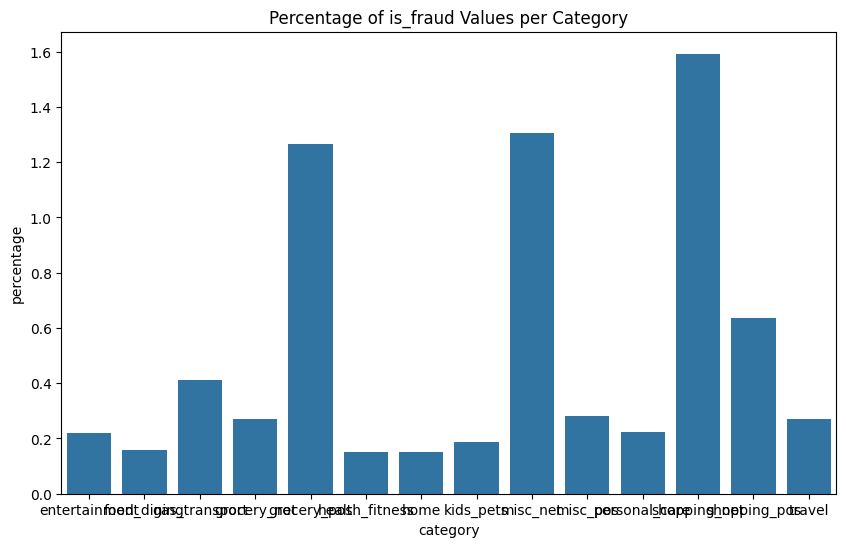

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataframe is named 'df'

# Calculate the average of 'is_fraud' for each 'category'
grouped_df = df.groupby('category')['is_fraud'].mean().reset_index()

# Calculate the percentage of 'is_fraud' values for each category
grouped_df['percentage'] = grouped_df['is_fraud'].apply(lambda x: x * 100)

# Plot the percentage of 'is_fraud' values for each category
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='percentage', data=grouped_df)
plt.title('Percentage of is_fraud Values per Category')
plt.show()

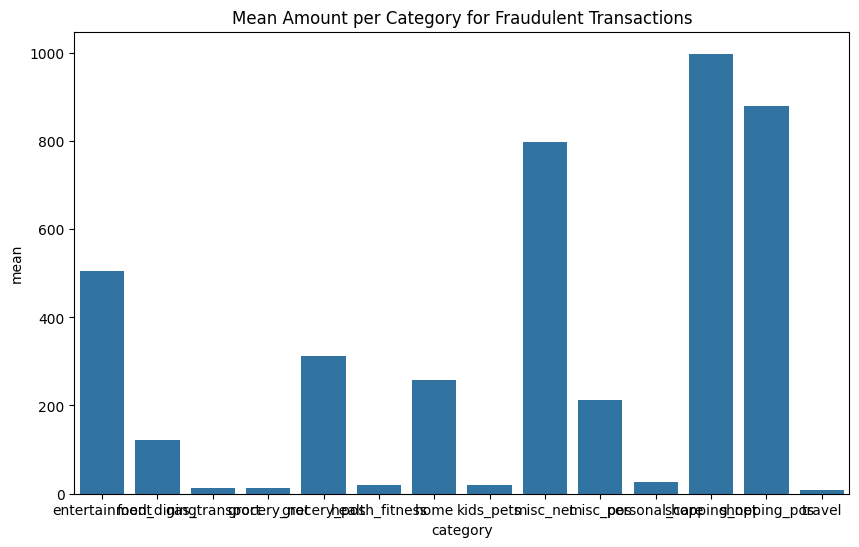

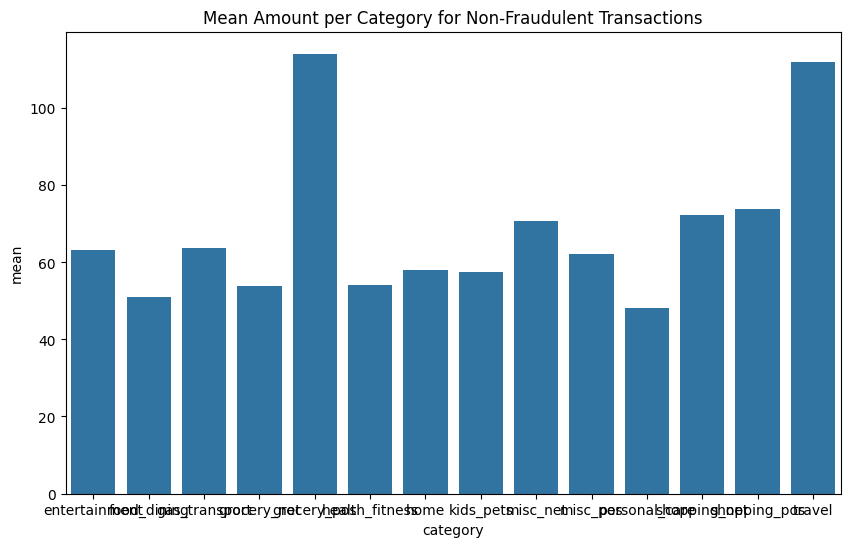

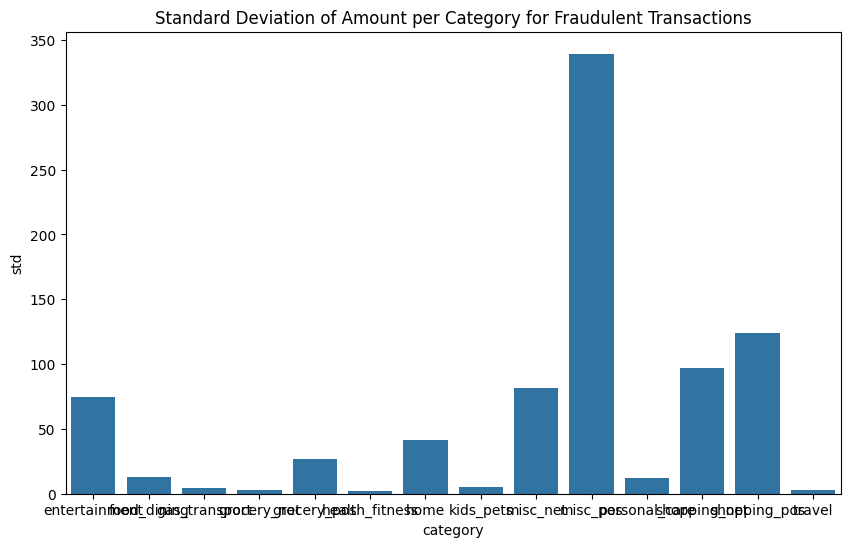

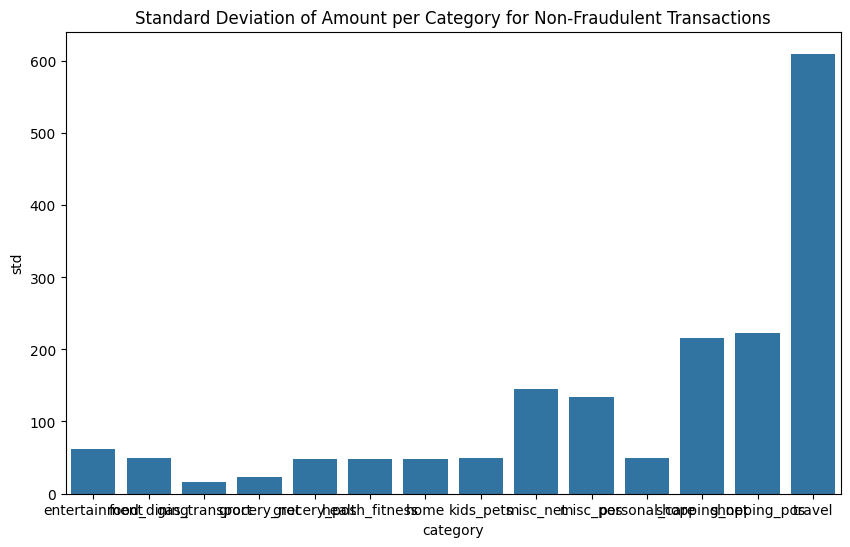

In [35]:

# Assuming your dataframe is named 'df'

# Create two new dataframes, one for fraudulent transactions and one for non-fraudulent transactions
fraud_df = df[df['is_fraud'] == 1].groupby('category')['amt'].agg(['mean', 'std']).reset_index()
non_fraud_df = df[df['is_fraud'] == 0].groupby('category')['amt'].agg(['mean', 'std']).reset_index()

# Plot the mean 'amt' for each category in the fraud_df dataframe
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='mean',data=fraud_df)
plt.title('Mean Amount per Category for Fraudulent Transactions')
plt.show()

# Plot the mean 'amt' for each category in the non_fraud_df dataframe
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='mean',data=non_fraud_df)
plt.title('Mean Amount per Category for Non-Fraudulent Transactions')
plt.show()

# Plot the standard deviation of 'amt' for each category in the fraud_df dataframe
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='std',  data=fraud_df)
plt.title('Standard Deviation of Amount per Category for Fraudulent Transactions')
plt.show()

# Plot the standard deviation of 'amt' for each category in the non_fraud_df dataframe
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='std',  data=non_fraud_df)
plt.title('Standard Deviation of Amount per Category for Non-Fraudulent Transactions')
plt.show()

It is very clear to see that the differences between fraudulent and non-fraud in amount spent per category is incredibly large, which means this would be very useful to have in our final model to tell patterns between other features and fraudulent cases

# 5. What is the distribution between time transactions between fraudulent transactions and non-fraudulent transactions? What is the most likely time of a fraudulent transaction?

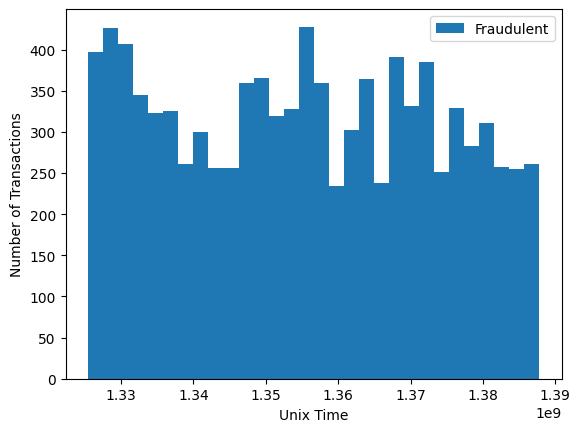

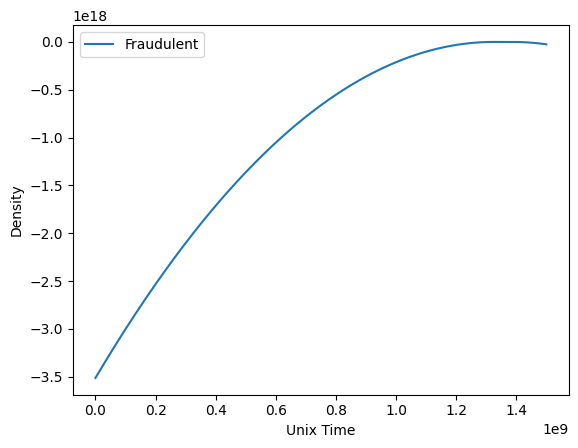

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Assuming the data is in a DataFrame called 'df'
fraud_transactions = df[df['is_fraud'] == 1]['unix_time']
non_fraud_transactions = df[df['is_fraud'] == 0]['unix_time']

# Plotting the histogram
plt.hist(fraud_transactions, bins=30, stacked=True, label=['Fraudulent', 'Non-fraudulent'])
plt.xlabel('Unix Time')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

# Plotting the KDE
kde_fraud = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(fraud_transactions.values.reshape(-1, 1))

x_axis = np.linspace(0, 1500000000, 1000)
plt.plot(x_axis, kde_fraud.score_samples(x_axis.reshape(-1, 1)), label='Fraudulent')
plt.xlabel('Unix Time')
plt.ylabel('Density')
plt.legend()
plt.show()

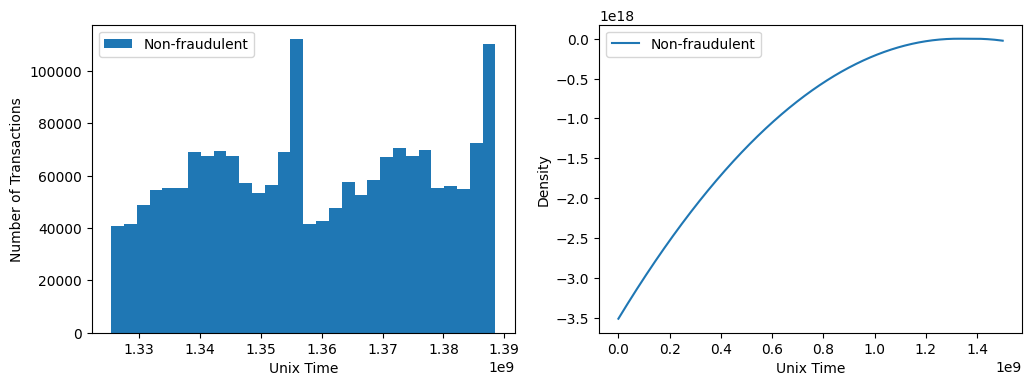

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Assuming the data is in a DataFrame called 'df'
fraud_transactions = df[df['is_fraud'] == 1]['unix_time']
non_fraud_transactions = df[df['is_fraud'] == 0]['unix_time']

# Plotting the histogram
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].hist(non_fraud_transactions, bins=30, stacked=True, label= 'Non-fraudulent')
ax[0].set_xlabel('Unix Time')
ax[0].set_ylabel('Number of Transactions')
ax[0].legend()

# Plotting the KDE
kde_non_fraud = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(non_fraud_transactions.values.reshape(-1, 1))

x_axis = np.linspace(0, 1500000000, 1000)
ax[1].plot(x_axis, kde_non_fraud.score_samples(x_axis.reshape(-1, 1)), label='Non-fraudulent')
ax[1].set_xlabel('Unix Time')
ax[1].set_ylabel('Density')
ax[1].legend()

plt.show()

In [38]:
df_unix = df.copy()
df_unix['trans_date_trans_time'] = df['trans_date_trans_time'].str.slice(11,19)

df_unix['trans_date_trans_time'] = pd.to_datetime(df_unix['trans_date_trans_time'])
avg_time = df_unix.groupby('is_fraud')['trans_date_trans_time'].mean()

print(avg_time)

is_fraud
0   2024-02-21 13:17:57.915524864
1   2024-02-21 14:32:59.004766208
Name: trans_date_trans_time, dtype: datetime64[ns]


Year turned funky because of the conversions, but I believe that is the average hour, which does not show a ton of difference between non fraud and fraud

In [39]:
df_unix["trans_date_trans_time"]

0         2024-02-21 00:00:18
1         2024-02-21 00:00:44
2         2024-02-21 00:00:51
3         2024-02-21 00:01:16
4         2024-02-21 00:03:06
                  ...        
1852389   2024-02-21 23:59:07
1852390   2024-02-21 23:59:09
1852391   2024-02-21 23:59:15
1852392   2024-02-21 23:59:24
1852393   2024-02-21 23:59:34
Name: trans_date_trans_time, Length: 1852394, dtype: datetime64[ns]

# 6. Is there a relationship between the distance between customer location (lat/lon) and merchant location (merch_lat/merch_lon) and fraudulent transactions?

In [40]:
import math

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    a = math.sin(dLat / 2) * math.sin(dLat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dLon / 2) * math.sin(dLon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c  # Distance in km
    return d

In [41]:
df_latlong = df.copy()
df_latlong['distance'] = df_latlong.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

# Calculate the correlation between distance and fraud
correlation = df_latlong['distance'].corr(df['is_fraud'])
print('Correlation between distance and fraud:', correlation)

Correlation between distance and fraud: 0.0003591679386918545


Using this function and formula to determine the distance between the two latlongs, then seeing if there was a correlation between that distance and if the data was fraudulent. The coorelation was low, but it may be different if instead of distance the coorellation looked at specific locations, though then that still would not matter the distance just the fraud location. 

# 7. Are certain states, cities, and zip codes more susceptible to fraudulent transactions?

In [42]:
df_location = pd.DataFrame()
df_location["city"] = df["city"].astype('category')
df_location["state"] = df["state"].astype('category')
df_location["zip"] = df["zip"].astype('category')
df_location["is_fraud"] = df["is_fraud"].astype('category')

In [43]:
df_location["city"] = df_location["city"].cat.codes.astype('float')
df_location["state"] = df_location["state"].cat.codes.astype('float')
df_location["zip"] = df_location["zip"].cat.codes.astype('float')
df_location["is_fraud"] = df_location["is_fraud"].cat.codes.astype('float')

In [44]:
df_location.dtypes

city        float64
state       float64
zip         float64
is_fraud    float64
dtype: object

In [45]:
correlation = df_location[['is_fraud', 'city', 'state', 'zip']].corr()
print(correlation)

          is_fraud      city     state       zip
is_fraud  1.000000 -0.001107 -0.000252 -0.002410
city     -0.001107  1.000000 -0.042611  0.076487
state    -0.000252 -0.042611  1.000000 -0.111386
zip      -0.002410  0.076487 -0.111386  1.000000


Based on this matrix, it did not really appear that there was a huge correlation, though I think that would change if we limit it down to only lat and long, as that tells about the same amount of information, and easier for a model to understand. With that in mind, I think it would be usefull to cut all of these difficult to use features out of the final model and just keep lat and long

# 8. What is the distribution of fraudulent and non-fraudulent transactions occurring for each day of the week (i.e., Sunday, Monday, etc.), each month of the year (i.e., January, February)?

In [46]:
df_days = df.copy()
df_days['trans_date_trans_time'] = pd.to_datetime(df_days['trans_date_trans_time'])
df_days['day_of_week'] = df_days['trans_date_trans_time'].dt.day_name()
df_days['day_of_month'] = df_days['trans_date_trans_time'].dt.day


In [47]:
fraud_transactions

2449       1325466397
2472       1325468849
2523       1325473523
2546       1325475483
2553       1325476547
              ...    
1813872    1387749948
1813949    1387750687
1814016    1387751508
1814204    1387753563
1814246    1387754019
Name: unix_time, Length: 9651, dtype: int64

In [48]:

# Count the number of fraudulent and non-fraudulent transactions per day
fraud_transactions = df_days[df_days['is_fraud'] == 1].groupby(['day_of_week', 'day_of_month']).size().reset_index(name='fraud_count')
non_fraud_transactions = df_days[df_days['is_fraud'] == 0].groupby(['day_of_week', 'day_of_month']).size().reset_index(name='non_fraud_count')

# Merge the two dataframes on 'day_of_week' and 'day_of_month'
merged_df = fraud_transactions.merge(non_fraud_transactions, on=['day_of_week', 'day_of_month'], suffixes=('_fraud', '_non_fraud'))


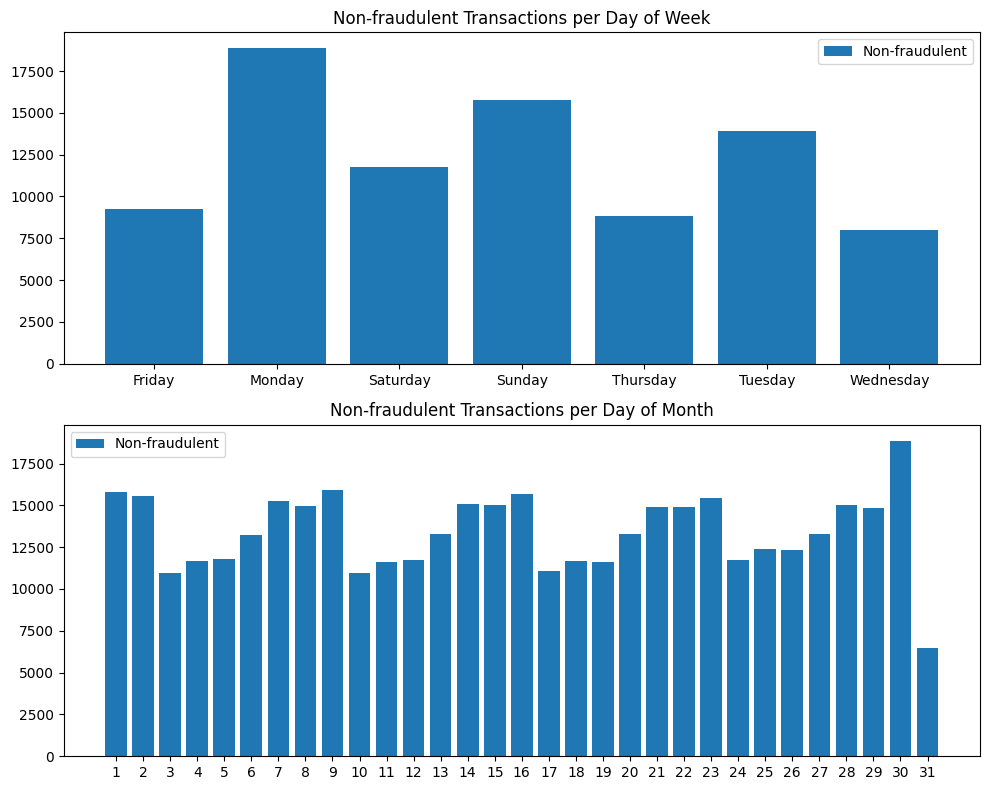

In [49]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].bar(merged_df['day_of_week'], merged_df['non_fraud_count'], label='Non-fraudulent')
ax[0].set_title('Non-fraudulent Transactions per Day of Week')
ax[0].set_xticks(range(7))
ax[0].set_xticklabels(merged_df['day_of_week'].unique())
ax[0].legend()

ax[1].bar(merged_df['day_of_month'], merged_df['non_fraud_count'], label='Non-fraudulent')
ax[1].set_title('Non-fraudulent Transactions per Day of Month')
ax[1].set_xticks(range(1, 32))
ax[1].set_xticklabels(merged_df['day_of_month'].unique())
ax[1].legend()

plt.tight_layout()
plt.show()

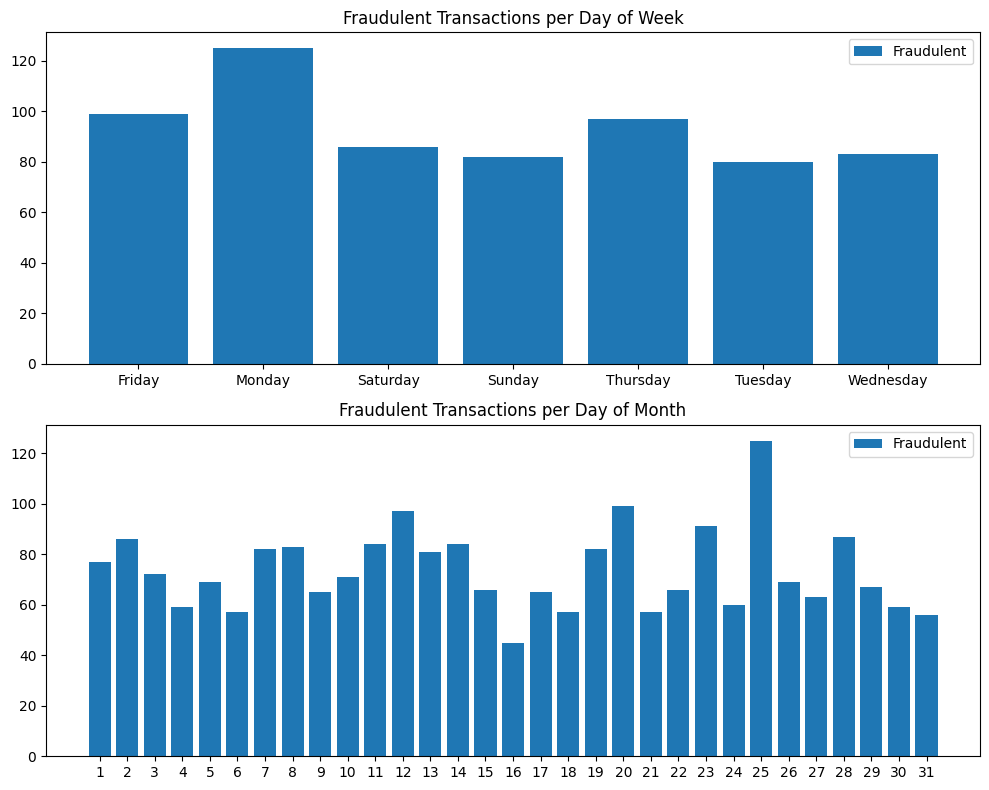

In [50]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].bar(merged_df['day_of_week'], merged_df['fraud_count'], label='Fraudulent')
ax[0].set_title('Fraudulent Transactions per Day of Week')
ax[0].set_xticks(range(7))
ax[0].set_xticklabels(merged_df['day_of_week'].unique())
ax[0].legend()

ax[1].bar(merged_df['day_of_month'], merged_df['fraud_count'], label='Fraudulent')
ax[1].set_title('Fraudulent Transactions per Day of Month')
ax[1].set_xticks(range(1, 32))
ax[1].set_xticklabels(merged_df['day_of_month'].unique())
ax[1].legend()

plt.tight_layout()
plt.show()

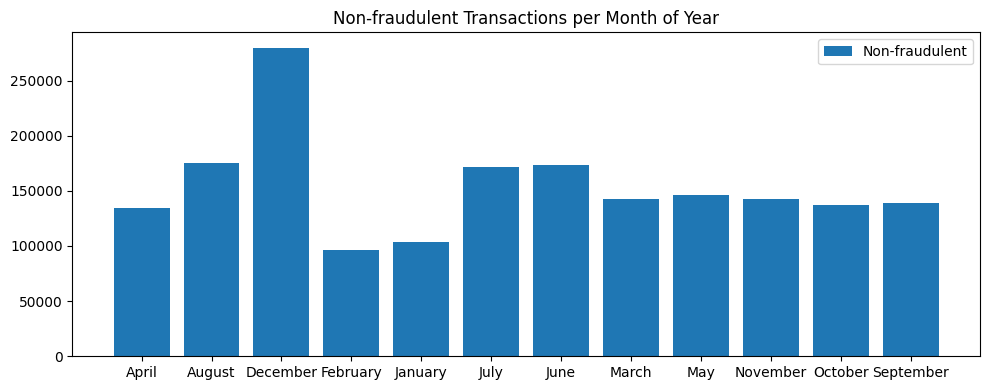

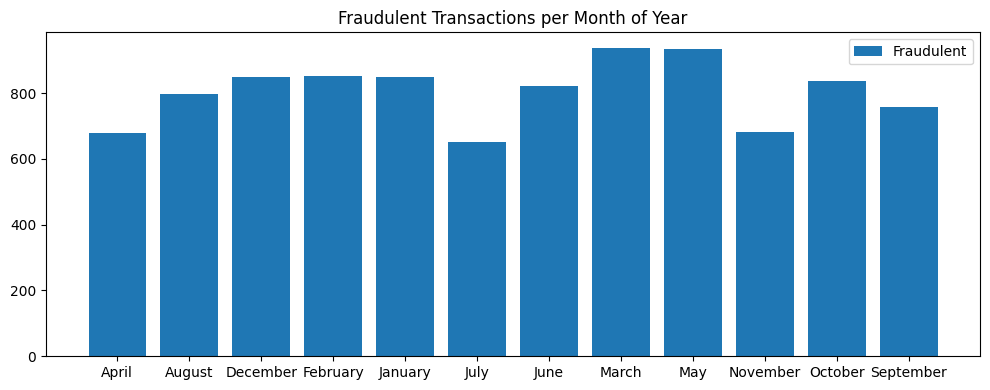

In [51]:
# Extract the month from the 'trans_date_trans_week' column
df_days['month_of_year'] = df_days['trans_date_trans_time'].dt.month_name()

# Count the number of fraudulent and non-fraudulent transactions per month
fraud_transactions = df_days[df_days['is_fraud'] == 1].groupby(['month_of_year']).size().reset_index(name='fraud_count')
non_fraud_transactions = df_days[df_days['is_fraud'] == 0].groupby(['month_of_year']).size().reset_index(name='non_fraud_count')

# Merge the two dataframes on 'month_of_year'
merged_df = fraud_transactions.merge(non_fraud_transactions, on=['month_of_year'], suffixes=('_fraud', '_non_fraud'))

# Create a bar graph for the month of the year
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.bar(merged_df['month_of_year'], merged_df['non_fraud_count'], label='Non-fraudulent')
ax.set_title('Non-fraudulent Transactions per Month of Year')
ax.set_xticks(range(12))
ax.set_xticklabels(merged_df['month_of_year'].unique())
ax.legend()

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.bar(merged_df['month_of_year'], merged_df['fraud_count'], label='Fraudulent')
ax.set_title('Fraudulent Transactions per Month of Year')
ax.set_xticks(range(12))
ax.set_xticklabels(merged_df['month_of_year'].unique())
ax.legend()

plt.tight_layout()
plt.show()

The crazy thing about these charts, is that with every different method of time, there seems to be a completely different pattern between fraud transactions, and non-fraud, which means that keeping track of the time of transactions may be very useful in the final model. 

# 9. Compared to any other time of the year, how prevalent are fraudulent transactions during the holidays (11-30 to 12-31)? During post-holidays (1-1 to 2-28)? During the summer (05-24 to 09-01)?

Luckily the previous graphs answer this question incredibly well. Compared to non-fraudulent transaction, fraudulent is almost consistent acrossed the whole year. Non-fraud the difference between the holidays and early year is nearly triple, and for summer it is double, where as for fraudulent, they are statisitically pretty similar with nearly no difference. The graph above this one shows that well. 

# 10. Is there a relationship between between "city_pop" and incidence of fraud?


In [52]:
label_percentage_per_job = pd.crosstab(df2['city_pop'], df2['is_fraud'], normalize='all')

In [53]:
result = label_percentage_per_job.reset_index().sort_values(by=1, ascending=False)


In [54]:
pd.set_option('display.max_rows', 10)


In [55]:
result

is_fraud,city_pop,0,1
890,2906700,0.003145,0.000021
881,1263321,0.002754,0.000021
886,1577385,0.001968,0.000019
866,673342,0.002748,0.000018
166,606,0.004328,0.000017
...,...,...,...
788,103927,0.000394,0.000000
451,3263,0.000788,0.000000
594,7646,0.002365,0.000000
163,595,0.001576,0.000000


It is fairly difficult to tell if city pop and fraud has some type of correlation, but based on this limited chart view, it may very well be the case. It would be useful to train a model with this included as there could be patterns of names, job types, and population based on some of the data shown.

# 11. Are certain "job" types susceptible to fraudulent transactions?

In [56]:
label_percentage_per_job = pd.crosstab(df2['job'], df2['is_fraud'], normalize='all')

In [57]:
result = label_percentage_per_job.reset_index().sort_values(by=1, ascending=False)


In [58]:
pd.set_option('display.max_rows', 10)


In [59]:
result

is_fraud,job,0,1
383,Quantity surveyor,0.004325,0.000037
309,Naval architect,0.006677,0.000036
287,Materials engineer,0.006289,0.000033
42,Audiological scientist,0.004720,0.000031
421,Senior tax professional/tax inspector,0.003142,0.000031
...,...,...,...
437,Statistician,0.001966,0.000002
107,Contractor,0.002356,0.000001
163,"Engineer, drilling",0.001576,0.000000
161,"Engineer, communications",0.001182,0.000000


In [60]:
df_job = pd.DataFrame()
df_job["city"] = df["city"].astype('category')
df_job["is_fraud"] = df["is_fraud"].astype('category')

In [61]:
df_job["job"] = df_job["city"].cat.codes.astype('float')
df_job["is_fraud"] = df_job["is_fraud"].cat.codes.astype('float')

In [62]:
correlation = df_job['is_fraud'].corr(df_job['job'])
print(f"The correlation between the label and the datapoint is {correlation}")

The correlation between the label and the datapoint is -0.0011073204129480663


Strangely enough, based on the data, it does look like certain job types are often targeted by those attempting to commit fraud. That could probably be for many different reasons from commonality, to income, to correlations with categories, all of which will also be usefull to test against.

# 12. Think of at least 4 more questions and provide the answers to them.

## 1. Some of the variables by themselves showed low correlation, what happens if you bring in investigations from multiple to test correlations? Say from question 2, 7, and 11 to see the results

In [63]:
df_test = pd.DataFrame()

df_test["job"] = df_job["job"]
df_test["city"] = df_location["city"]
df_test["state"] = df_location["state"]
df_test["zip"] = df_location["zip"]
df_test["dob"] = df2["dob"]
df_test["is_fraud"] = df_location["is_fraud"]

In [64]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
df_test[['job', 'city', 'state', 'zip', 'dob']] = min_max_scaler.fit_transform(df_test[['job', 'city', 'state', 'zip', 'dob']])


In [65]:
X = df_test.loc[:, df_test.columns != 'is_fraud'].values
y = df_test.loc[:, df_test.columns == 'is_fraud'].values.ravel()

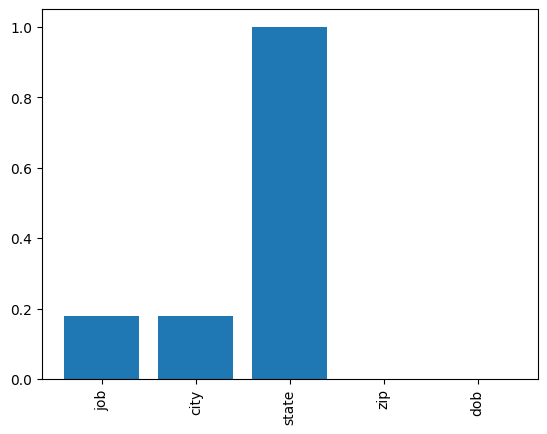

In [66]:
from sklearn.feature_selection import SelectPercentile, f_classif


selector = SelectPercentile(f_classif, percentile=10)
# Fit the data
selector.fit(X, y)
scores = selector.pvalues_
scores /= scores.max()

# Display
cols = list(df_test.loc[:, df_test.columns != 'is_fraud'].columns.values)
y_pos = np.arange(len(cols))
plt.bar(y_pos, scores)
plt.xticks(y_pos, cols, rotation=90)
plt.show()

## 2. Select possible features that would be beneficial to a final use case. 

There were a lot of options in features in this dataset, some not very useful, and some contained so much data that it required further breaking down. For example, the time, that contained useful information in day of week, day of month, month, time of day, etc. Here are a list of features I went with:

* sex -- it is good to see if males or females are typically targeted with fraud easier, though it should not matter, it very well could especially when throughing in certain categories that might have correlations for specific people
* first and last name -- it seemed to have a correlation with more common names being a target of fraud
* category -- categories, based on investigation above, did seem to have some specific categories much more commonly a target of fraud\
* Job -- oddly there was a weird correlation with job and fraud targeted, even with percentages taken in account
* merchant -- there was a correlation between the merchants and fraud as it seemed maybe specific places names held more value
* time, day of week, day of month -- all of these had differences between fraud and non fraud in the data, especially when split up into an easy to use format.
* Dob changed to generation -- this allowed correlations to show between which generation, percentage wise, had a correlation with fraud

I am sure there are others that would have worked and could be used in different scenarios but these are what I went with for the above reasons.

## 3. List Features that have no use 

Some features to remove that have no use to us are typically features that are simply tokens to count a transaction, or something to keeptrack of. Some features are redundant and simply are not used. Here is the list of features that are for sure removed before training a model:

* trans_num -- a unique id not useful for training
* cc_num -- should be unique per user and not useful 
* unix time -- redundant with transaction time in another feature
* City -- geographical feature that is redundant and harder to use then lat/long
* State -- geographical feature that is redundant and harder to use then lat/long
* zipcode -- geographical feature that is redundant and harder to use then lat/long
* unnamed: 0 -- not even sure what this feature was suppose to be, so lets remove it just incase


## 4. Select a few plausible models, and list why they would be good for this scenario

Many models would fit this situation, but I do think that there are some that fit the bill better then others. Out of the models I would use, here are the ones I think I would go with

* Deep Neural network (feed forward with dropout) -- Neural networks are good at taking in data and learning what it can about that data that leads to clusters, correlations, and patterns that humans may not see. In a dataset with so much data as well as so many different features, a neural network could take a lot of time to learn it. It may get a very high scoring but would be very costly to run and upkeep due to drifting, training time, and overfitting which neural networks are prone to.
* Random Forest -- Random forests are useful because of how they can create trees using random amounts of features, random depth, and really a lot of randomness in the trees. To encourage even more randomness, an ensemble of random forests could be made which prevents overfitting while retains the ability to have accurate predictions. A random forest probably would not be the best performer, but it would be a good performer that is fairly easy to implement.
* Support vector machines -- fraud data contains a lot of data that can produce clustering and figuring out how exactly fraud could happen. A support vector machine is very useful in finding those clusters and dividing them out to use that for prediction. So if, like the predictions show, this data seems to compound together for patterns and clusters, an SVM could help find that. However SVMs can be very prone to overfitting, or never fitting if the data is not well clustered enough and may take a lot of processing to get down to a usable limit.